# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [1]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import random

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [4]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    return y

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000,) (10000,)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [5]:
#code here
def create_model():
    
    model = Sequential()
    model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(Conv2D(64, 3, activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    return model

In [6]:
def model_history(model):
    
    training_accuracy = model.history['accuracy']
    testing_accuracy = model.history['val_accuracy']
    training_loss = model.history['loss']
    testing_loss = model.history['val_loss']
    
    return training_accuracy, testing_accuracy, training_loss, testing_loss

In [7]:
def plot_graphs(epochs,training_accuracy, testing_accuracy, training_loss, testing_loss):
    
    epochs = [x for x in range(1, epochs+1)]
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
    ax1.plot(epochs, training_accuracy, color="red", label="training accuracy")
    ax1.plot(epochs, testing_accuracy,color="blue", label="testing accuracy")
    ax1.set_title("Number of epochs vs Accuracy Plot")
    ax1.set(xlabel = "Number of epochs", ylabel = "Accuracy")
    ax1.legend()
    ax2.plot(epochs, training_loss, color="red", label="training loss")
    ax2.plot(epochs, testing_loss, color="blue", label="testing loss")
    ax2.set_title("Number of epochs vs Loss Plot")
    ax2.set(xlabel = "Number of epochs", ylabel = "Loss")
    ax2.legend()


In [8]:
def randomize(y_train, noise):
    
    l = len(y_train) * (noise/100)
    for i in range(int(l)):
        x = random.randint(0,9)
        while x==y_train[i] :
            x = random.randint(0,9)
        
        y_train[i] = x
    
    return y_train

In [9]:
def cnn_model(noise=0):
    
    model = create_model()
    model.summary()
    epochs = 10
    earlystopping = EarlyStopping(monitor='val_accuracy', patience = 2)
    y_train_new = randomize(y_train, noise)
    model = model.fit(x_train, y_train_new, validation_data=(x_test,y_test), epochs = epochs, callbacks=[earlystopping])
    training_accuracy, testing_accuracy, training_loss, testing_loss = model_history(model)
    epochs = len(training_accuracy)
    return epochs, training_accuracy, testing_accuracy, training_loss, testing_loss

In [10]:
epochs, training_accuracy, testing_accuracy, training_loss, testing_loss = cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-trai

In [11]:
print("Training Accuracy : ", training_accuracy[epochs-1])
print("Testing Accuracy : ",testing_accuracy[epochs-1])
print("Training Loss : ", training_loss[epochs-1])
print("Testing Loss : ", testing_loss[epochs-1])

Training Accuracy :  0.9917833209037781
Testing Accuracy :  0.9854000210762024
Training Loss :  0.02542264387011528
Testing Loss :  0.04508158564567566


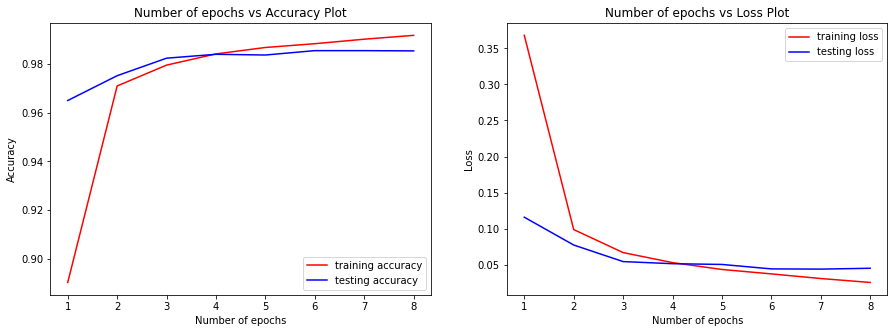

In [12]:
plot_graphs(epochs, training_accuracy, testing_accuracy, training_loss, testing_loss)

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


# Noise = 20%

In [13]:
epochs, training_accuracy, testing_accuracy, training_loss, testing_loss = cnn_model(20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

In [14]:
print("Training Accuracy : ", training_accuracy[epochs-1])
print("Testing Accuracy : ",testing_accuracy[epochs-1])
print("Training Loss : ", training_loss[epochs-1])
print("Testing Loss : ", testing_loss[epochs-1])

Training Accuracy :  0.7868666648864746
Testing Accuracy :  0.9807000160217285
Training Loss :  0.9825921058654785
Testing Loss :  0.291390061378479


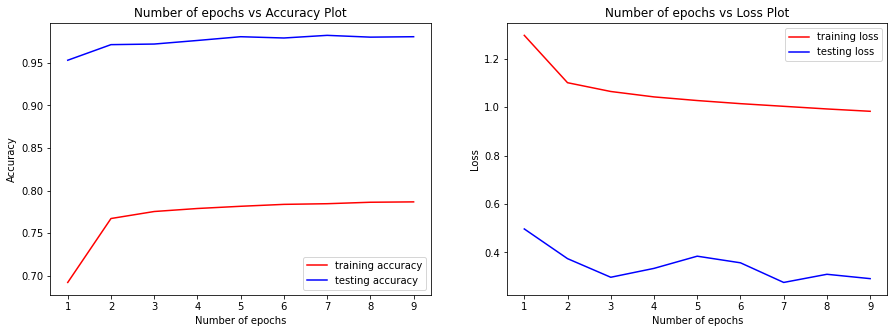

In [15]:
plot_graphs(epochs, training_accuracy, testing_accuracy, training_loss, testing_loss)

# Noise = 40%

In [16]:
epochs, training_accuracy, testing_accuracy, training_loss, testing_loss = cnn_model(40)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

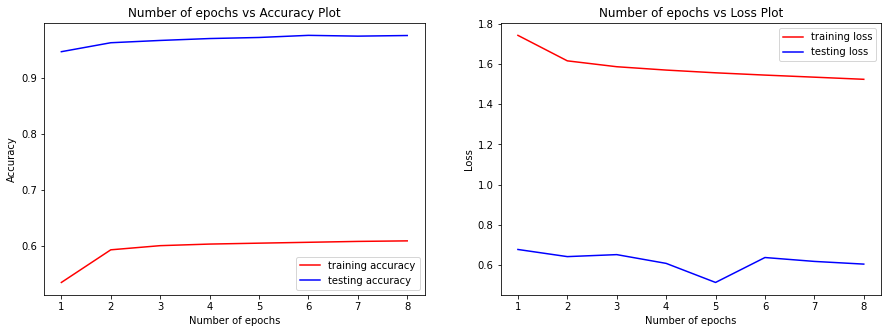

In [17]:
plot_graphs(epochs, training_accuracy, testing_accuracy, training_loss, testing_loss)

# Noise = 60%

In [18]:
epochs, training_accuracy, testing_accuracy, training_loss, testing_loss = cnn_model(60)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

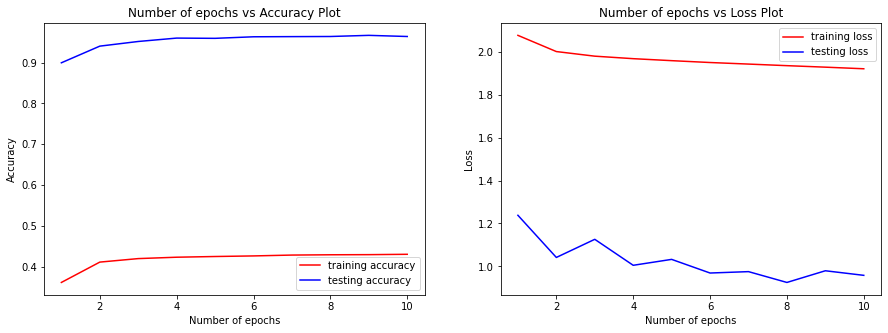

In [19]:
plot_graphs(epochs, training_accuracy, testing_accuracy, training_loss, testing_loss)

# Noise = 80%

In [20]:
epochs, training_accuracy, testing_accuracy, training_loss, testing_loss = cnn_model(80)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

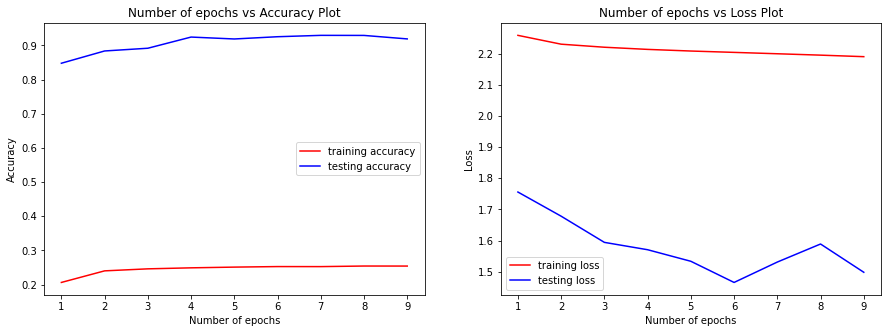

In [21]:
plot_graphs(epochs, training_accuracy, testing_accuracy, training_loss, testing_loss)

# Noise = 100%

In [22]:
epochs, training_accuracy, testing_accuracy, training_loss, testing_loss = cnn_model(100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                501770    
                                                                 
Total params: 613,194
Trainable params: 613,194
Non-tr

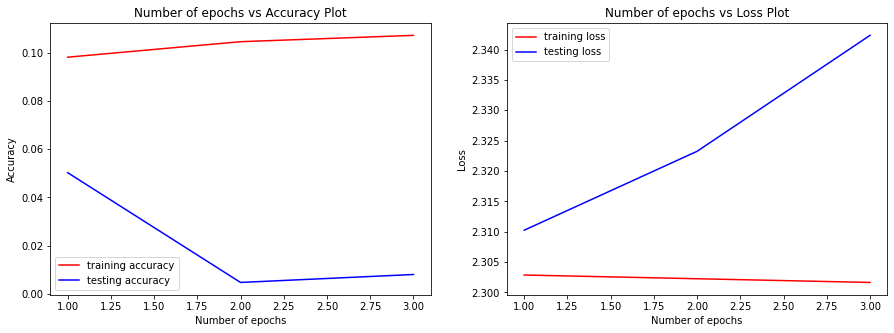

In [23]:
plot_graphs(epochs, training_accuracy, testing_accuracy, training_loss, testing_loss)